# Cleansing and Wrangling Data All Data Published Since 2021-09-25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from daftpy.daftprep import process_price, process_coordinates, drop_coord_outliers, drop_floor_area, \
floor_area_wragling, process_floor_area, drop_info, process_info, process_views, process_rooms

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [3]:
sale_data = pd.read_csv('data_available/sale_data.csv', sep=',', parse_dates=['entered_renewed', 'scraping_date'])
sale_data.shape

(18559, 17)

In [4]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18559 entries, 0 to 18558
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   daft_id                       18559 non-null  int64         
 1   item_id                       18559 non-null  int64         
 2   url                           18559 non-null  object        
 3   name                          18559 non-null  object        
 4   price                         18559 non-null  object        
 5   info                          18559 non-null  object        
 6   sale_type                     18559 non-null  object        
 7   floor_area                    18559 non-null  object        
 8   psr                           18559 non-null  object        
 9   ber                           18494 non-null  object        
 10  entered_renewed               18559 non-null  datetime64[ns]
 11  views                       

In [5]:
sale_data.replace('none', np.nan, inplace=True)
sale_data.isna().sum()

daft_id                             0
item_id                             0
url                                 0
name                              220
price                             220
info                              220
sale_type                         231
floor_area                        231
psr                             10466
ber                              3446
entered_renewed                     0
views                               0
type_house                       3767
energy_performance_indicator    10545
coordinates                         0
type                                0
scraping_date                       0
dtype: int64

In [6]:
sale_data.sample()

,daft_id,item_id,url,name,price,info,sale_type,floor_area,psr,ber,entered_renewed,views,type_house,energy_performance_indicator,coordinates,type,scraping_date
3716,16457421,3571268,https://www.daft.ie/for-sale/semi-detached-hou...,"57 Shanliss Road, Santry, Dublin 9","€395,000","3 Bed,2 Bath,88 m²,Semi-D",For Sale by Private Treaty,88 m²,NaN,F,2021-10-08,275,house,434.55 kWh/m2/yr,53.391241+-6.253806,buy,2021-10-09


## Price

In [7]:
sale_data[['price']].head(10) ###AMV

,price
0,"€779,000"
1,"€224,000"
2,"€185,000"
3,"AMV: €249,950"
4,"€995,000"
5,"€540,000"
6,"€420,000"
7,"€250,000"
8,Price on Application
9,"€625,000"


In [8]:
#sale_data.loc[(sale_data['price'] != 'Price on Application') & (sale_data['price'] != 'AMV: Price on Application'), 'price']

In [9]:
pd.DataFrame({'before': sale_data['price'], 
              'after': process_price(sale_data)['price']}).head(10)
# Al llamar aqui se cambia el df, por eso lo aplicamos sobre una copia

,before,after
0,"€779,000",779000.0
1,"€224,000",224000.0
2,"€185,000",185000.0
3,"AMV: €249,950",249950.0
4,"€995,000",995000.0
5,"€540,000",540000.0
6,"€420,000",420000.0
7,"€250,000",250000.0
8,Price on Application,NaN
9,"€625,000",625000.0


In [10]:
sale_data = process_price(sale_data.copy()).reset_index(drop=True)
print(sale_data.shape)
sale_data['price'].isna().sum()

(17559, 17)


220

In [11]:
print(sale_data.shape)
#sale_data.dropna(subset=['price'], inplace=True).reset_index(drop=True, inplace=True)
sale_data = sale_data.dropna(subset=['price']).reset_index(drop=True)
print(sale_data.shape)

(17559, 17)
(17339, 17)


## Coordinates

In [12]:
sale_data['coordinates'].sample()

14819    52.687005+-8.617782
Name: coordinates, dtype: object

In [13]:
sale_data = process_coordinates(sale_data)

(17339, 17)
(17339, 18)


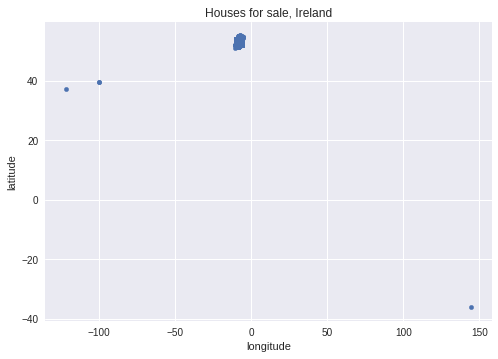

In [14]:
sale_data.plot(kind='scatter', x='longitude', y='latitude', title='Houses for sale, Ireland');

In [15]:
sale_data = drop_coord_outliers(sale_data)

(17339, 18)
(17325, 18)


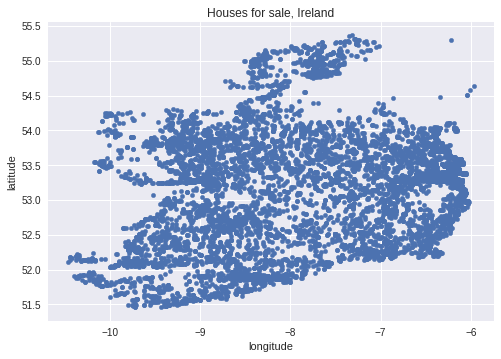

In [16]:
sale_data.plot(kind='scatter', x='longitude', y='latitude', title='Houses for sale, Ireland'); # esta un poco achatada pero es Irlanda

## Floor Area

In [17]:
sale_data['floor_area'].sample(30)

6947                          96 m²
1800                          93 m²
4                            316 m²
14910                         85 m²
10357    For Sale by Private Treaty
13222                        418 m²
81                            85 m²
17303    For Sale by Private Treaty
9682                         121 m²
2282     For Sale by Private Treaty
11613                        136 m²
938      For Sale by Private Treaty
15663                        135 m²
15116                        103 m²
8573                          81 m²
10974                        154 m²
6555     For Sale by Private Treaty
9938                        1.27 ac
9009                          77 m²
1226                         154 m²
16780                       0.82 ac
9018                        2.38 ac
11093                         85 m²
1145                         125 m²
8112                         0.5 ac
1003                          80 m²
371                          155 m²
15910                       

In [18]:
sale_data['floor_area'].str.contains('m²').sum()

10645

In [19]:
sale_data.shape[0] - sale_data['floor_area'].str.contains('m²').sum() #---> Drop 6680 assets
# Estudiar los precios medios, etc, de las casas eliminadas para ver si son similares a los que tienen m²

6680

In [20]:
#sale_data.dropna(subset=['floor_area']).loc[sale_data.dropna(subset=['floor_area'])['floor_area'].str.contains('m²'), ['floor_area']]

In [21]:
sale_data['floor_area'].str.contains('m²').head(3)

0     True
1    False
2     True
Name: floor_area, dtype: object

In [22]:
sale_data['floor_area'].str.contains('m²').head(3) == False

0    False
1     True
2    False
Name: floor_area, dtype: bool

In [23]:
index_to_drop = sale_data[sale_data['floor_area'].str.contains('m²') == False].index
len(index_to_drop) # esta diferenci de 8 se debe a missing values

6672

In [24]:
#, inplace=True
sale_data.drop(index=index_to_drop)['floor_area'].isna().sum()

8

In [25]:
sale_data.drop(index=index_to_drop).loc[sale_data.drop(index=index_to_drop)['floor_area'].isna(), ['info']]
# Los que tienen missing value en `floor_area` tampoco tienen los m² en `info` ---> Drop

,info
7757,"3 Bed,1 Bath,Detached"
12236,Site
12653,Site
12895,"5 Bed,2 Bath,Semi-D"
12984,Site
12998,Site
13003,Site
15251,"3 Bed,1 Bath,Terrace"


In [26]:
index_to_drop = sale_data[(sale_data['floor_area'].str.contains('m²') == False) | 
                          (sale_data['floor_area'].isna())].index
len(index_to_drop) # esta diferenci de 8 se debe a missing values

6680

In [27]:
sale_data['floor_area'].sample(3)

12400                         60 m²
17126    For Sale by Private Treaty
14401                         84 m²
Name: floor_area, dtype: object

In [28]:
print(f'Before: {sale_data.shape}')
sale_data = process_floor_area(sale_data)
print(f'After: {sale_data.shape}')

Before: (17325, 18)
index_to_drop: 6680

Before dropping: (17325, 18)
After dropping: (10645, 18)
----------
Diference: 6680 rows
After: (10645, 18)


## Info

In [29]:
sale_data[['info', 'floor_area']].sample(15)

,info,floor_area
7570,"4 Bed,3 Bath,145 m²,Detached",145
9527,"4 Bed,3 Bath,107 m²,Semi-D",107
9831,"3 Bed,3 Bath,84 m²,Apartment",84
1349,"2 Bed,2 Bath,59 m²,Apartment",59
16397,"2 Bed,1 Bath,83 m²,Terrace",83
12110,"3 Bed,2 Bath,87 m²,Semi-D",87
1581,"4 Bed,3 Bath,101 m²,Semi-D",101
13383,"5 Bed,5 Bath,413 m²,Detached",413
14565,"4 Bed,3 Bath,155 m²,Detached",155
1218,"1 Bed,1 Bath,53 m²,Detached",53


In [30]:
sale_data['info'].isna().sum()

0

In [31]:
sale_data['info'].dropna().str.split(',').apply(len).value_counts()

4    10448
3      163
2       34
Name: info, dtype: int64

In [32]:
sale_data.dropna(subset=['info']).loc[sale_data['info'].dropna().str.split(',').apply(len) == 2, ['info', 'floor_area']].head() 
#---> Drop, no tenemos info sobre `bedroom` and `bathroom`

,info,floor_area
16,"121 m²,Terrace",121
157,"121 m²,Terrace",121
364,"121 m²,Terrace",121
949,"121 m²,Terrace",121
1459,"121 m²,Terrace",121


In [33]:
sale_data.dropna(subset=['info']).loc[(sale_data['info'].dropna().str.split(',').apply(len) == 3), ['info', 'floor_area']].head()
#---> Drop, falta info sobre `bedrooms` or `bathroom`. Si esas variables resultan no ser relevantes podemos agnadir las rows despues

,info,floor_area
0,"5 Bed,260 m²,Detached",260
123,"3 Bed,113 m²,Semi-D",113
139,"5 Bed,260 m²,Detached",260
304,"3 Bed,113 m²,Semi-D",113
332,"5 Bed,260 m²,Detached",260


In [34]:
sale_data = process_info(sale_data)

(10645, 18)
(10448, 18) 
---------
Dropped: 197 rows

(10448, 18)
(10448, 20) 
---------
Dropped: 2 columns



## Psr and Energy Performance Indicator

In [35]:
sale_data.isna().sum()

daft_id                            0
item_id                            0
url                                0
name                               0
price                              0
info                               0
sale_type                          0
floor_area                         0
psr                             5888
ber                              352
entered_renewed                    0
views                              0
type_house                       701
energy_performance_indicator    4472
type                               0
scraping_date                      0
latitude                           0
longitude                          0
bedroom                            0
bathroom                           0
dtype: int64

In [36]:
(sale_data.shape[0] - sale_data[['psr', 'energy_performance_indicator']].isna().sum()) / sale_data.shape[0]

psr                             0.436447
energy_performance_indicator    0.571975
dtype: float64

Vamos a eliminar las dos columnas porque tienen un elevado porcentaje de missing values.

In [37]:
print(f'Before dropping: {sale_data.shape}')
sale_data.drop(columns=['psr', 'energy_performance_indicator'], inplace=True)
print(f'After dropping: {sale_data.shape}')

Before dropping: (10448, 20)
After dropping: (10448, 18)


## Ber and Type House

No parecen variables muy relevantes a priori, de modo que las vamos a eliminar en un principio para no lidiar con los missing values de dichas clumnas.

In [38]:
print(f'Before dropping: {sale_data.shape}')
sale_data.drop(columns=['ber', 'type_house', 'item_id', 'info'], inplace=True) # tambien eliminamos otra que seran inutiles
print(f'After dropping: {sale_data.shape}')

Before dropping: (10448, 18)
After dropping: (10448, 14)


In [39]:
sale_data.sample()

,daft_id,url,name,price,sale_type,floor_area,entered_renewed,views,type,scraping_date,latitude,longitude,bedroom,bathroom
6355,16365986,https://www.daft.ie/for-sale/semi-detached-hou...,"9 Kildalton Walk, Banagher Court, Piltown, Co....",185000.0,For Sale by Private Treaty,102,2021-10-01,53,buy,2021-10-02,52.352752,-7.331756,3 Bed,3 Bath


In [40]:
sale_data.isna().sum()

daft_id            0
url                0
name               0
price              0
sale_type          0
floor_area         0
entered_renewed    0
views              0
type               0
scraping_date      0
latitude           0
longitude          0
bedroom            0
bathroom           0
dtype: int64

## Views

In [41]:
sale_data['views'].isna().sum()

0

In [42]:
def process_views(df):
    df['views'] = df['views'].str.replace(',', '').astype(float)
    return df

In [43]:
sale_data = process_views(sale_data)

## Bedroom and Bathroom

In [44]:
sale_data['bedroom'].value_counts()

3 Bed     3686
4 Bed     2655
2 Bed     2199
5 Bed     1057
1 Bed      428
6 Bed      264
7 Bed       66
8 Bed       40
9 Bed       14
10 Bed      13
12 Bed       7
13 Bed       5
11 Bed       4
14 Bed       4
18 Bed       2
24 Bed       1
16 Bed       1
19 Bed       1
43 Bed       1
Name: bedroom, dtype: int64

In [45]:
sale_data['bathroom'].value_counts()

2 Bath     3403
1 Bath     3203
3 Bath     2568
4 Bath      802
5 Bath      262
6 Bath       82
7 Bath       49
8 Bath       31
9 Bath       24
10 Bath       7
11 Bath       6
16 Bath       3
14 Bath       2
12 Bath       2
15 Bath       1
13 Bath       1
47 Bath       1
17 Bath       1
Name: bathroom, dtype: int64

In [46]:
def process_rooms(df):
    df['bedroom'] = df['bedroom'].str.split(' ').str[0]
    df['bathroom'] = df['bathroom'].str.split(' ').str[0]
    return df

In [47]:
sale_data = process_rooms(sale_data)

In [48]:
sale_data[['bedroom', 'bathroom']].sample(3)

,bedroom,bathroom
955,2,1
1505,4,3
9231,3,3


In [49]:
sale_data.to_csv('data_available/sale_data_post_C&W_All.csv', sep=',', index=False)

In [50]:
#pd.read_csv('data_available/sale_data_post_C&W_All.csv', sep=',').shape